# SALES DATA ANALYSIS

In [312]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [313]:
sales = pd.read_csv("sales_data.xls")

# Exploratory Data Analysis

In [314]:
#I am trying to check how the data is structured
#column headings and row labels 
sales.head(4)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status,location
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success,Saint Helena
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success,Saint Helena


In [315]:
# check if there are any empty cells in the dataset 
sales.isnull().sum()

customer_id        0
device_id          0
item_id            0
line_item_id       0
order_id           0
event_id           0
event_timestamp    0
quantity           0
currency           0
checked_out_at     0
status             0
location           0
dtype: int64

In [316]:
#check number of column  and rows 
sales.shape

(578320, 12)

In [317]:
sales.set_index('location',inplace=True)

In [318]:
sales.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success


In [319]:
sales.index

Index(['Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena', 'Saint Helena', 'Saint Helena',
       'Saint Helena', 'Saint Helena',
       ...
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island', 'Christmas Island', 'Christmas Island',
       'Christmas Island'],
      dtype='object', name='location', length=578320)

In [320]:
# list af all the locations or countries where all the customers purchase from...
unique_index = sales.index.unique().sort_values()
unique_index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)',
       'Antigua and Barbuda', 'Argentina',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=243)

In [321]:
#check the number of unique states in the data . this is where the sales is present
unique_index.nunique()

243

In [322]:
#check the number of times each location appears and put it in decreasing order
#top 10 
sales.index.value_counts().sort_values(ascending=False).head(10)

location
Korea            6997
Argentina        4507
Mauritius        4414
Jersey           4130
Panama           3936
French Guiana    3851
Guernsey         3804
Guatemala        3731
Albania          3721
Philippines      3675
Name: count, dtype: int64

In [323]:
# i need to check why these ones have very low occurence 
sales.index.value_counts().sort_values(ascending=False).tail(10)

location
Greece                     1214
Saint Kitts and Nevis      1201
Honduras                   1195
Cocos (Keeling) Islands    1168
Taiwan                     1122
Chad                       1082
Malaysia                   1037
Austria                     921
Italy                       783
Uruguay                     734
Name: count, dtype: int64

<Axes: xlabel='location'>

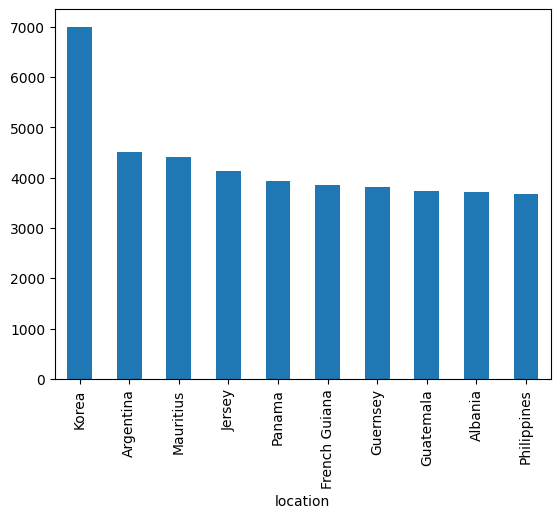

In [324]:
sales.index.value_counts().head(10).plot(kind='bar')

<Axes: xlabel='location'>

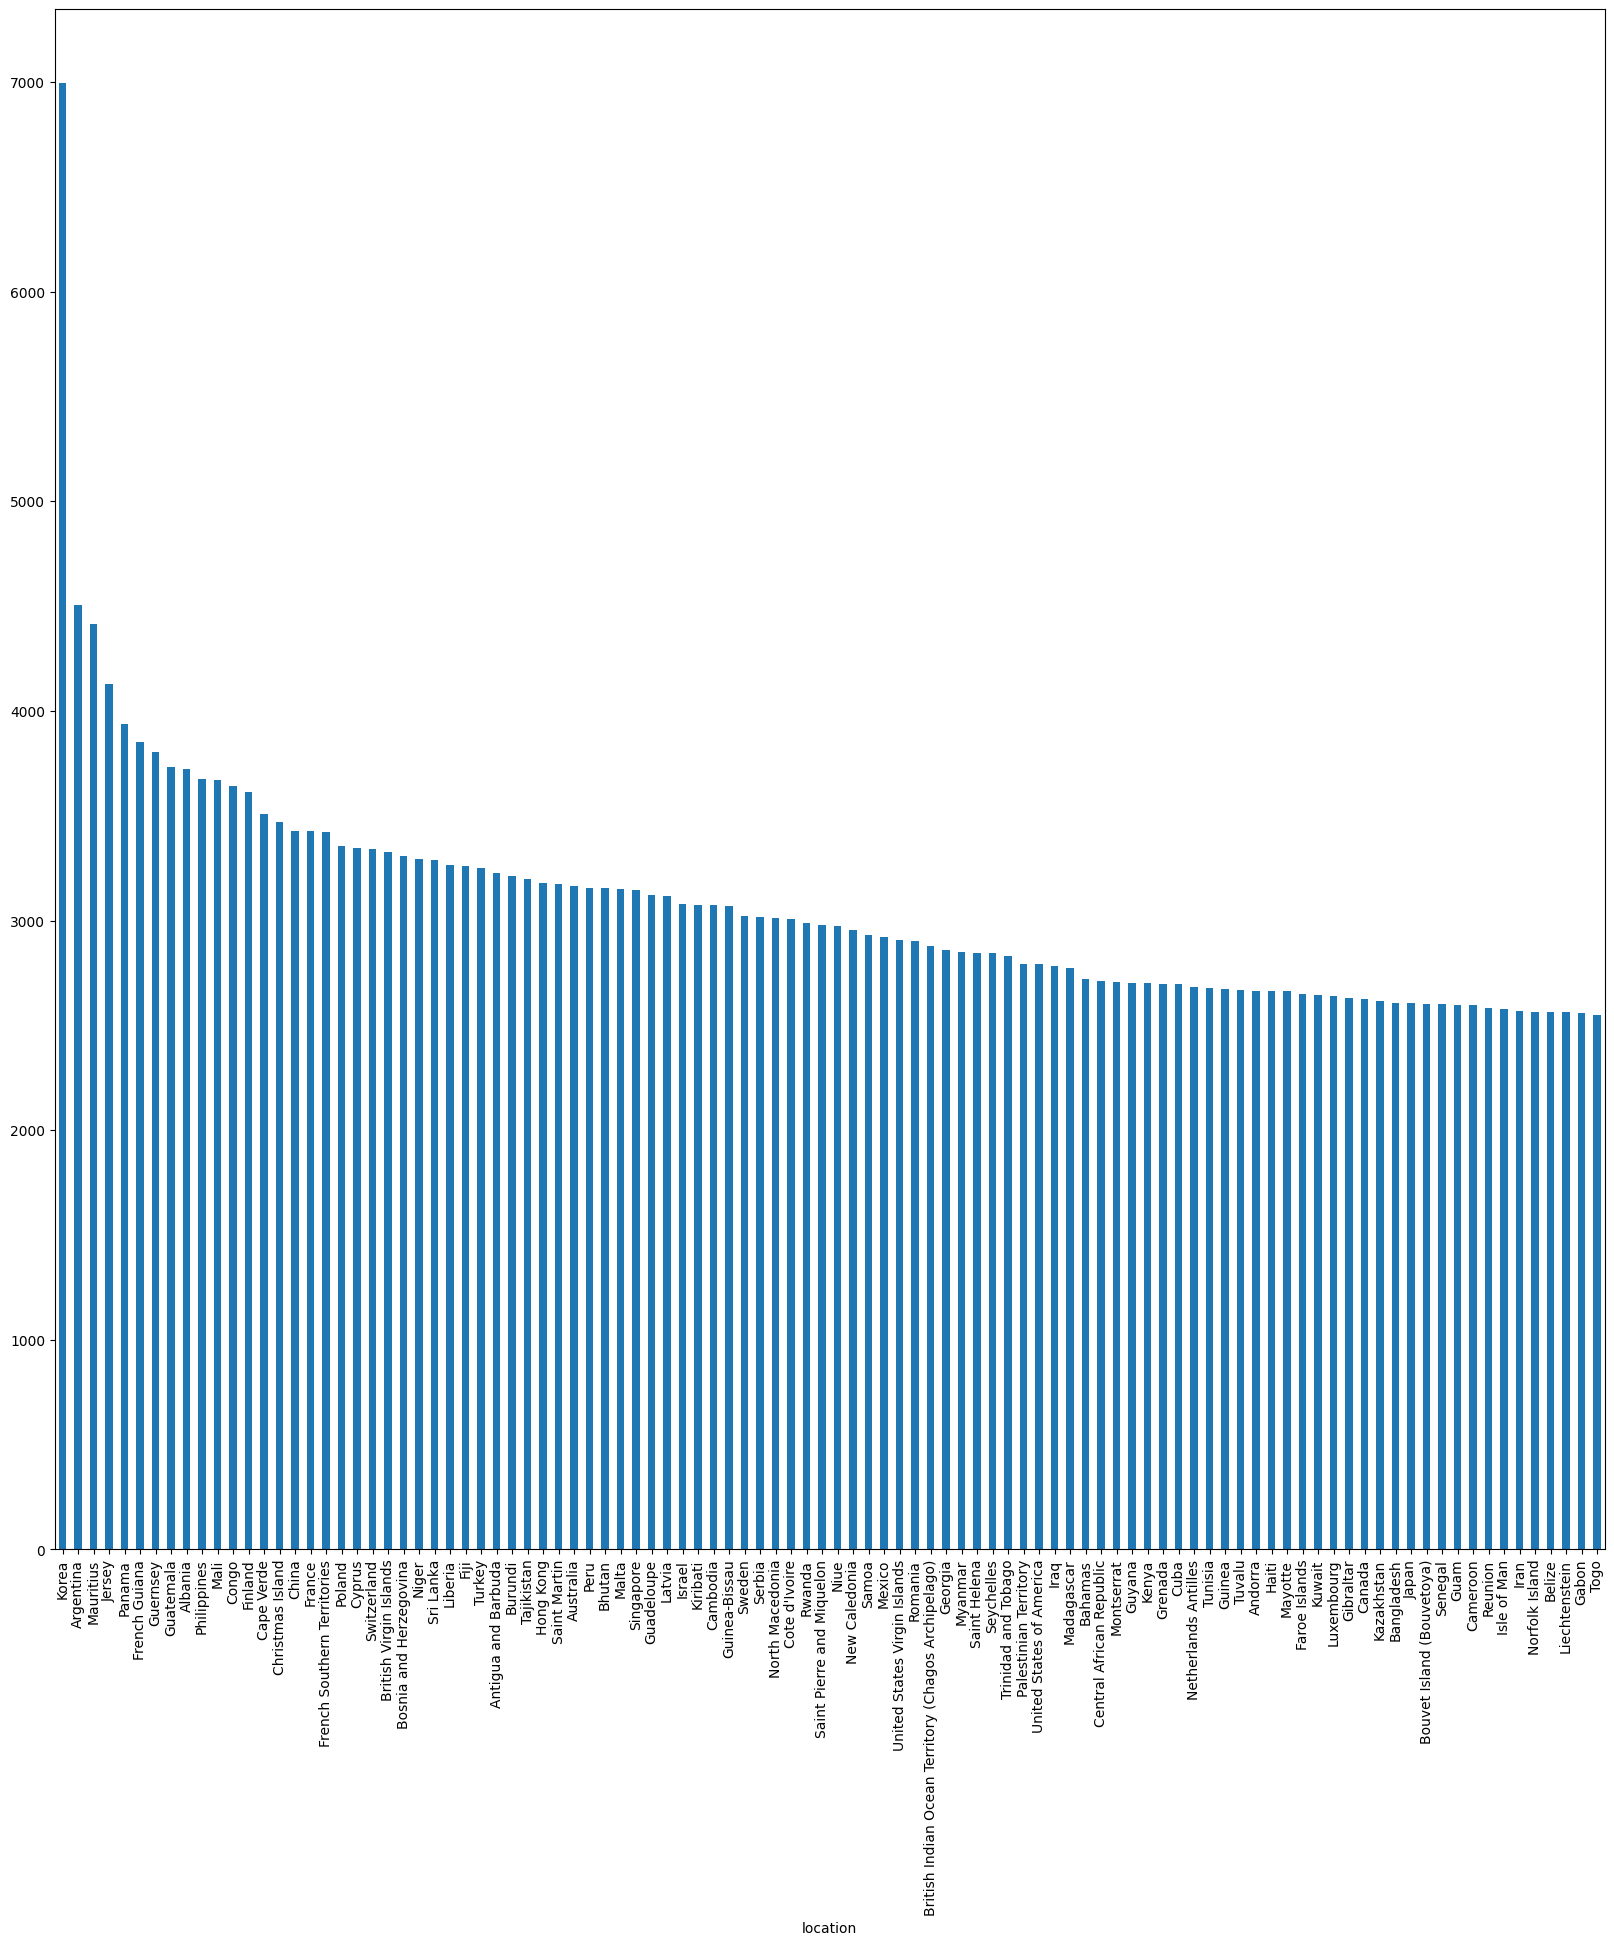

In [325]:
sales.index.value_counts().head(100).plot(kind='bar',figsize=(20,20))

<Axes: xlabel='location'>

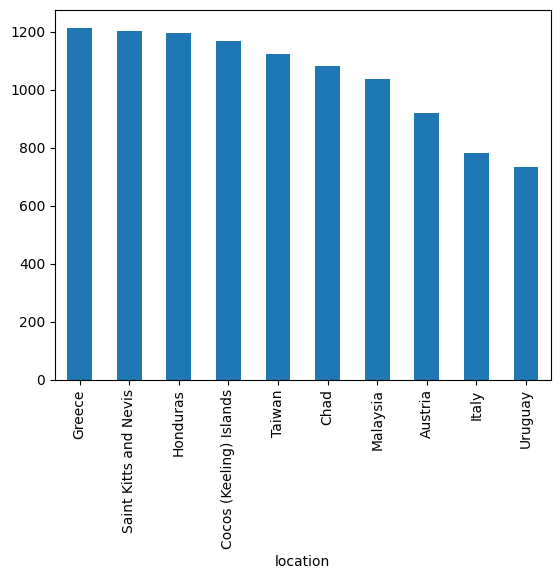

In [326]:
sales.index.value_counts().tail(10).plot(kind='bar')

<Axes: xlabel='location'>

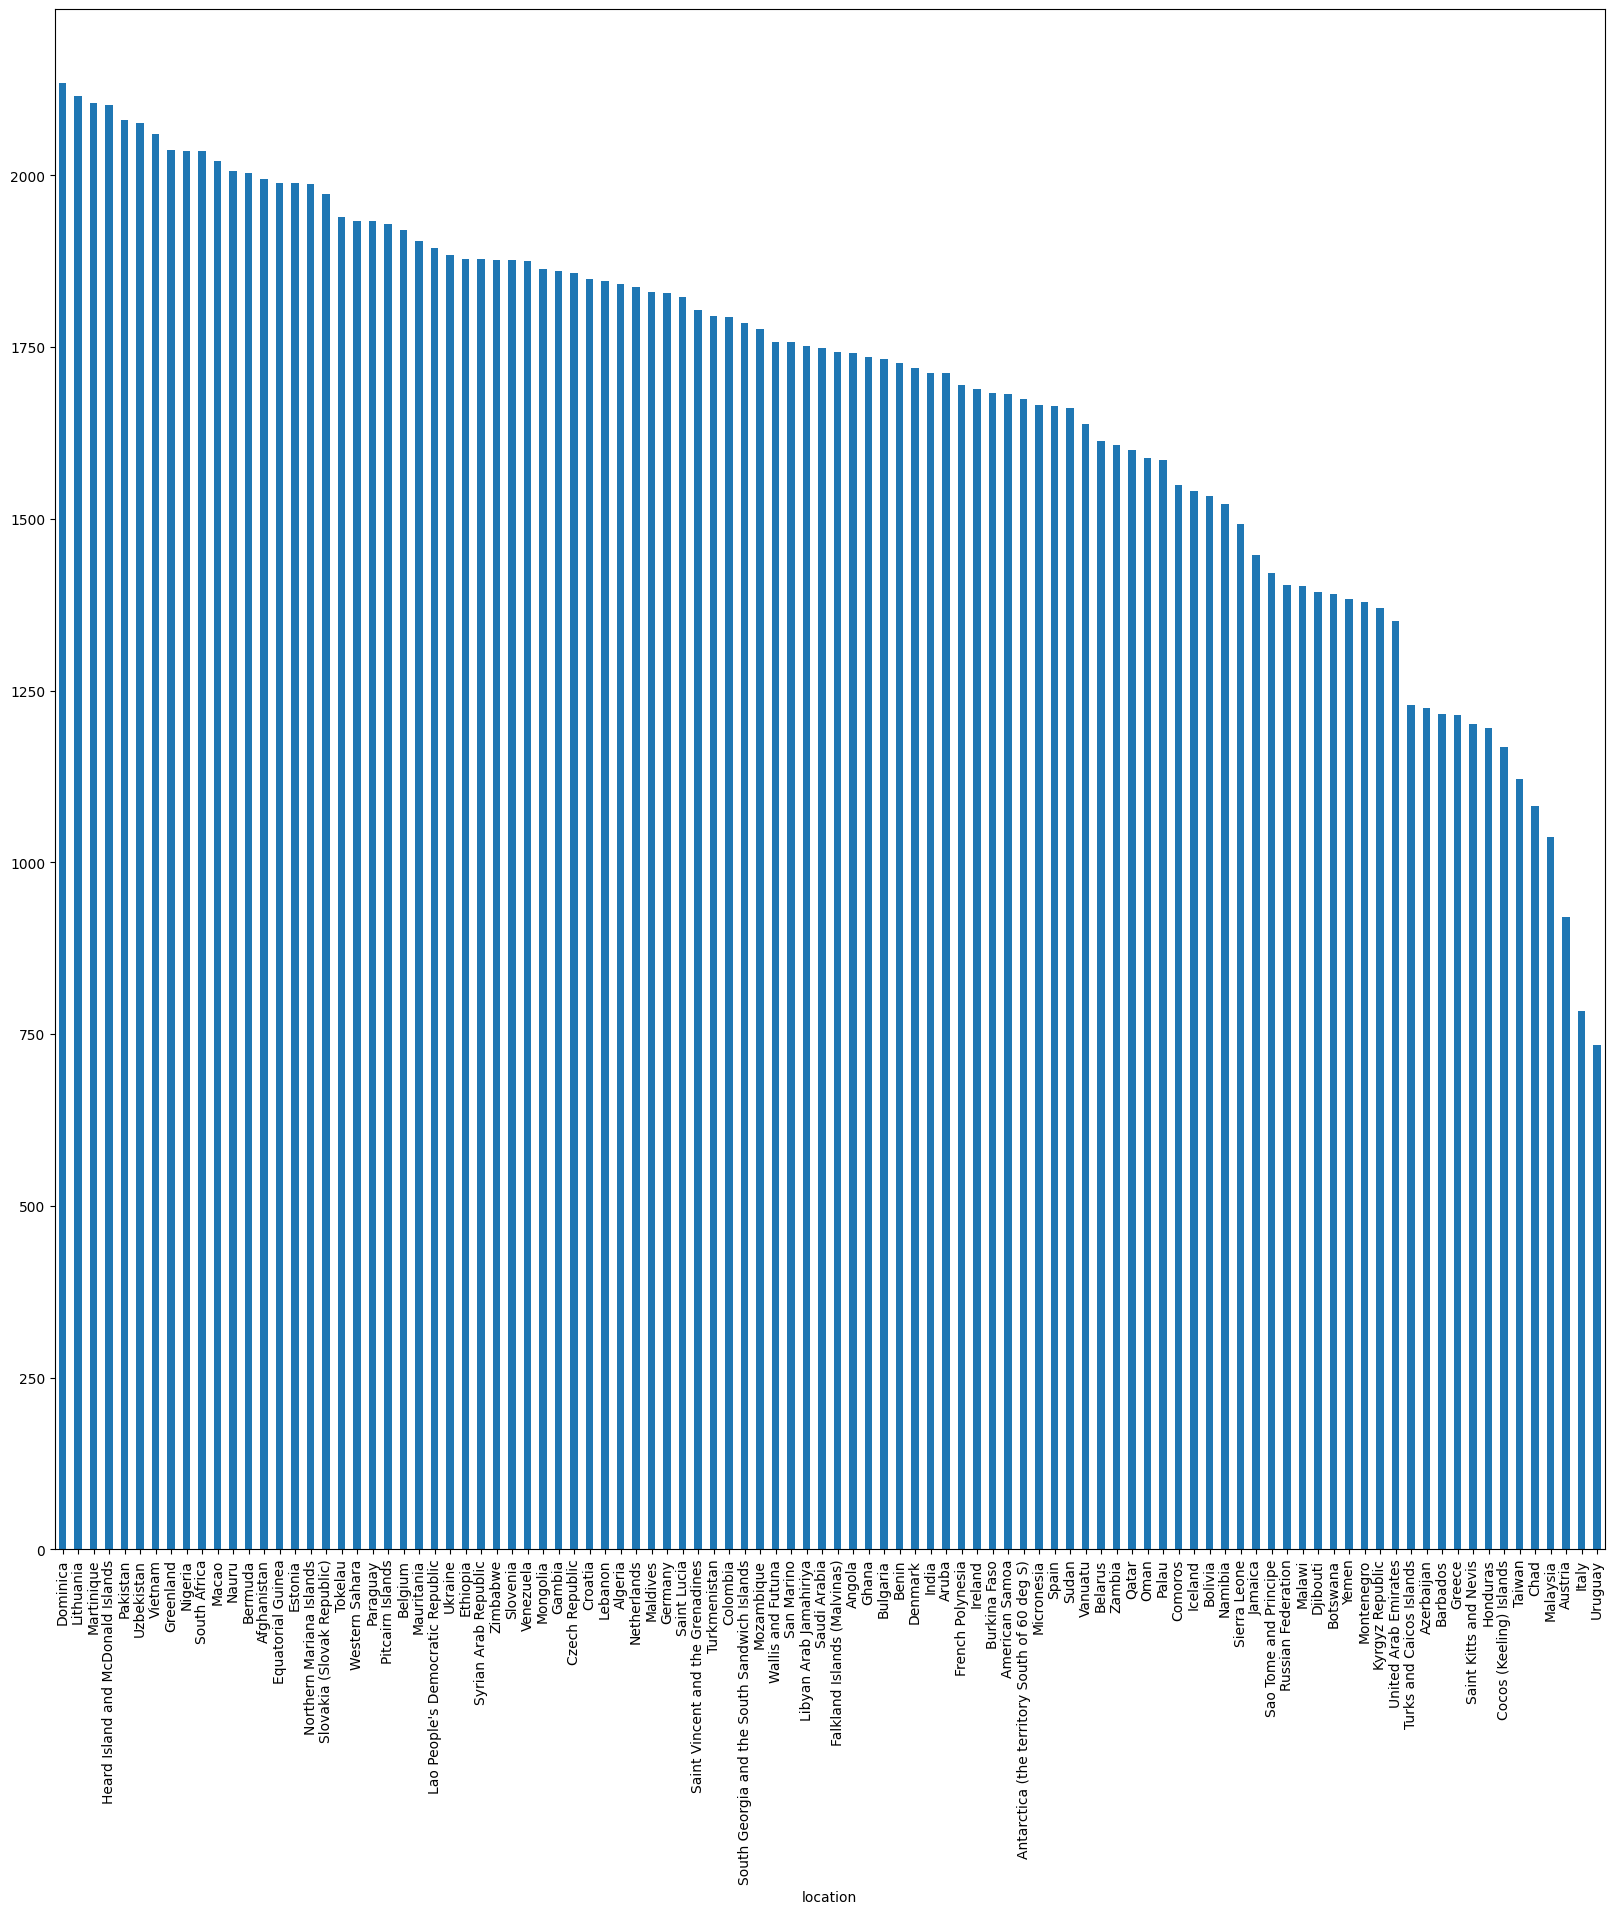

In [327]:
sales.index.value_counts().tail(100).plot(kind='bar',figsize=(20,20))

In [328]:
unique_index.nunique()

243

In [329]:
sales.columns

Index(['customer_id', 'device_id', 'item_id', 'line_item_id', 'order_id',
       'event_id', 'event_timestamp', 'quantity', 'currency', 'checked_out_at',
       'status'],
      dtype='object')

In [330]:
sales.columns.nunique()

11

In [331]:
len(sales.columns)

11

In [332]:
#we have 4594 unique customer ID's
sales["customer_id"].nunique()

4594

In [333]:
sales.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success


In [334]:
#grouped it by location
sales['customer_id'].head()

location
Saint Helena    cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena    cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena    cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena    cda7bec0-7cbf-4145-baf9-e049bab94504
Saint Helena    cda7bec0-7cbf-4145-baf9-e049bab94504
Name: customer_id, dtype: object

In [335]:
sales['customer_id'].tail()

location
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Christmas Island    ef15a7b3-326c-405f-9eef-3dbf43c85a9d
Name: customer_id, dtype: object

In [336]:
#this is showing the customer ids that appear least and most with the state they ordered from 
locationgroup = sales.groupby('location')['customer_id'].value_counts().sort_values(ascending=False)
locationgroup.head()


location        customer_id                         
Saint Helena    eb7dcb88-073d-403e-bdd4-1e5725fe2338    372
Nauru           a7d9058a-163e-4632-9bde-1f57130130cb    360
United Kingdom  12e94262-2eaa-47d9-85c9-6f55e434f5c8    360
Comoros         be8ce4e3-c596-43c2-8b70-bdcecada2139    360
Argentina       c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
Name: count, dtype: int64

In [337]:
locationgroup.tail()

location                          customer_id                         
Lao People's Democratic Republic  020a728c-76fb-404e-9135-ae9ccd7709ee    3
Cayman Islands                    4e412d78-27e6-42b2-803d-0762df783312    3
Lao People's Democratic Republic  81d65a2c-0fd0-4d83-9dee-2d435b3926ab    3
Bhutan                            cf9e159a-aff9-4049-aa81-a90550a64d14    3
American Samoa                    ea724654-3ddb-4ffb-bb69-d36ee291c7cf    3
Name: count, dtype: int64

In [338]:
#i tried to check the distribution of customer Id in Bhutan
locationgroup.loc['Bhutan']

customer_id
ae74034a-58a5-45a6-83e6-5a2f5157b974    288
0e6d8a1e-3203-40c5-92df-29c951149ade    264
2bfed359-1587-4783-ac3e-d81b65f6633e    264
21346664-b09d-4ad5-86af-e3ff7ccc3c51    253
b80e34de-6c93-487d-abb8-ab350a8a4caf    240
22be1a7f-8c37-4d70-a4ba-c9324e04e24e    231
92fe5320-931d-4ac7-a102-83d357c6db93    220
9ee13bb4-8252-4b7e-aeb1-5d0b84d48367    209
f7a28416-bf47-43b8-a5ef-59d425f67c8b    209
fd358fed-8437-4df2-8c67-08f548d1e962    189
006db9e0-aaa7-49bc-9659-2ac0a527cb03    153
320cf5c1-82c1-4ed4-830a-9184abfc9e25    153
64e8f000-964e-46c6-bd46-3dcecd425191    144
f54915b9-72f0-4d18-8c5d-66e842c6757b     90
c03710fb-c19d-42c0-98c6-079560ab01f4     78
d5423953-3f1e-420d-9c2d-bc040f3bda1d     70
d2e74323-5bea-416e-8c1b-1627790c766b     44
5421bae9-0d5c-4460-b066-6d2d740b7c4a     26
d57e08eb-e2a5-436d-800e-0ab7bad16877     16
53612dad-b7ee-4a9e-880e-3f210336e7b1     10
cf9e159a-aff9-4049-aa81-a90550a64d14      3
Name: count, dtype: int64

i want to check korea 

In [339]:
korea = sales.loc['Korea']
Argentina = sales.loc['Argentina']
italy = sales.loc['Italy']
uruguay= sales.loc['Uruguay']

In [340]:
korea.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,14,3914,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,5,USD,2024-03-30 04:06:10.636247,cancelled
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,8,3915,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,2,USD,2024-03-30 04:06:10.636247,cancelled


In [341]:
korea.describe()

,item_id,line_item_id,event_id,quantity
count,6997.000000,6997.000000,6997.000000,6997.000000
mean,8.081892,17213.773046,79731.335144,2.976418
std,4.412644,8567.112513,39731.170456,1.387743
min,1.000000,3914.000000,18219.000000,1.000000
25%,4.000000,9593.000000,44311.000000,2.000000
50%,8.000000,17837.000000,82671.000000,3.000000
75%,12.000000,24031.000000,111260.000000,4.000000
max,15.000000,34179.000000,158594.000000,5.000000


In [342]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, Korea to Korea
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      6997 non-null   object
 1   device_id        6997 non-null   object
 2   item_id          6997 non-null   int64 
 3   line_item_id     6997 non-null   int64 
 4   order_id         6997 non-null   object
 5   event_id         6997 non-null   int64 
 6   event_timestamp  6997 non-null   object
 7   quantity         6997 non-null   int64 
 8   currency         6997 non-null   object
 9   checked_out_at   6997 non-null   object
 10  status           6997 non-null   object
dtypes: int64(4), object(7)
memory usage: 656.0+ KB


the date is not in datetime , the checkout time too 

In [343]:
Argentina.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,5,4205,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,3,GBP,2024-03-30 04:08:10.700090,failed
Argentina,6a43e01f-4081-445b-b960-82b7f4599d8b,0a6776a5-af66-4f8d-b857-bfc66929f486,12,4206,16803a46-f73f-4c9c-a532-3772fdf323e3,19435,2024-03-23 17:59:17.738107,2,GBP,2024-03-30 04:08:10.700090,failed


In [344]:
italy.head(1)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Italy,a19fe3f8-9e15-4741-87cc-7e765427c9be,5469121f-6eba-4e1e-8d0f-e02be7561d5b,11,5788,5ea40773-efdd-4eff-9718-5bff839940eb,26450,2024-03-30 04:03:11.062988,5,USD,2024-03-30 04:12:11.063044,success


In [345]:
uruguay.head(1)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Uruguay,ea47a95b-0c19-4170-a55b-8638fd274266,dc6bc8d7-47aa-41f1-bc57-e8c3d878cf67,3,5005,c754cd0e-b915-440f-a23b-5d88fc2337a5,23016,2024-03-30 04:03:10.885239,5,GBP,2024-03-30 04:11:10.885293,cancelled


In [346]:
koreauniquecustomerid = korea['customer_id'].unique()
koreauniquecustomerid

array(['3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9',
       '06dd6a77-c841-4939-b036-cfe3bdf53da2',
       '34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf',
       '9c22dec8-5972-48a8-bbb7-799a143c8ed8',
       'b457e733-476a-4e7a-937e-43663473cf2c',
       '537e15dd-d4b4-4c88-9bf5-a9d91b28bfae',
       'dc92921e-d371-4be4-83a1-a6cf1ae6f14c',
       '6c43713d-d00b-4f6c-8f12-c12d544ef10e',
       'b96e4177-81e7-4707-b2e9-f595a767f91d',
       '2933e91f-39d6-44af-b1e8-933ad172a3c6',
       'eb7e787b-1b51-498f-9eb4-abb076497eb4',
       'fb5d6586-f262-4b2a-9f98-7026bbe1f627',
       '06e91d5f-3189-45b8-9c6b-5a1624eebddd',
       'b20fe203-25fc-4ad8-96e9-5c8031093064',
       '74a50970-d815-4f32-b958-5bc152098746',
       '6160bf50-4da5-4a66-b8ee-7afc316bbb7d',
       '7fa5edef-7d33-46d3-b0ba-37f8d7ef6d43',
       '3b854d31-c6d8-4726-ab17-f37ad98de785',
       'c3915c78-69af-4c0d-adcb-cc5e2ce7b30e',
       'c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810',
       '27493173-b1c8-4260-9a70-263929d06890',
       '15760

In [347]:
korea['customer_id'].value_counts()

customer_id
2933e91f-39d6-44af-b1e8-933ad172a3c6    324
39568cc0-3642-4234-9b88-c339d6953adf    319
c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810    297
d3020319-b4d6-4318-bad8-faabccada7ec    276
0af30150-d4e3-4a65-a719-df2b7a17da93    276
dc92921e-d371-4be4-83a1-a6cf1ae6f14c    275
b4139e14-0478-41f0-bcbb-6792f0c6d957    275
15760ae0-fa3d-48c8-b23c-a8326a5e0576    264
95960342-6a57-4fc3-a360-6cc094281e3e    260
90e76254-adc5-4b89-9c3b-c23fd5a60df7    252
3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9    252
6c43713d-d00b-4f6c-8f12-c12d544ef10e    231
06e91d5f-3189-45b8-9c6b-5a1624eebddd    231
537e15dd-d4b4-4c88-9bf5-a9d91b28bfae    225
8498e8be-5899-4ad4-821f-d0df3da83157    220
14b95b46-73a0-47e2-b061-47a904aa5bd7    210
fb5d6586-f262-4b2a-9f98-7026bbe1f627    210
b96e4177-81e7-4707-b2e9-f595a767f91d    209
b20fe203-25fc-4ad8-96e9-5c8031093064    200
34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf    198
6301a1f1-4726-4197-83af-f79cfc804f05    198
3b854d31-c6d8-4726-ab17-f37ad98de785    171
eb7e787b-1b51-498f-9

In [348]:
korea['customer_id'].value_counts().shape

(46,)

In [349]:
cust2933e91f=korea[korea['customer_id'] == '2933e91f-39d6-44af-b1e8-933ad172a3c6']

In [350]:
cust2933e91f.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,2933e91f-39d6-44af-b1e8-933ad172a3c6,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,6,9587,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,44297,2024-03-28 10:10:19.554243,4,USD,2024-03-30 04:09:12.023457,failed
Korea,2933e91f-39d6-44af-b1e8-933ad172a3c6,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,4,9588,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,44297,2024-03-28 10:10:19.554243,2,USD,2024-03-30 04:09:12.023457,failed
Korea,2933e91f-39d6-44af-b1e8-933ad172a3c6,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,5,9589,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,44297,2024-03-28 10:10:19.554243,2,USD,2024-03-30 04:09:12.023457,failed


In [351]:
cust2933e91f.describe()

,item_id,line_item_id,event_id,quantity
count,324.000000,324.000000,324.000000,324.000000
mean,8.083333,9592.500000,44310.000000,3.666667
std,4.355257,3.457392,7.800929,1.180334
min,1.000000,9587.000000,44297.000000,2.000000
25%,4.750000,9589.750000,44303.000000,2.750000
50%,7.500000,9592.500000,44310.000000,4.000000
75%,11.500000,9595.250000,44317.000000,5.000000
max,15.000000,9598.000000,44323.000000,5.000000


2933e91f-39d6-44af-b1e8-933ad172a3c6 made 324 purchase attempt 
now i want to check the duration of this  purchase and status

In [352]:
cust2933e91f.loc[:,['device_id','order_id','event_timestamp','quantity','checked_out_at', 'status']]

,device_id,order_id,event_timestamp,quantity,checked_out_at,status
location,,,,,,
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-28 10:10:19.554243,4,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-28 10:10:19.554243,2,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-28 10:10:19.554243,2,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-28 10:10:19.554243,4,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-28 10:10:19.554243,2,2024-03-30 04:09:12.023457,failed
...,...,...,...,...,...,...
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-30 04:09:12.023457,5,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-30 04:09:12.023457,5,2024-03-30 04:09:12.023457,failed
Korea,df00f95e-f46f-4e90-9e5d-6c9b05a145a6,9df50767-05c1-4e3b-a40d-7ba4ddb42c74,2024-03-30 04:09:12.023457,5,2024-03-30 04:09:12.023457,failed


In [353]:
korea['status'].unique()

array(['cancelled', 'success', 'failed'], dtype=object)

In [354]:
cust2933e91f_sucess= (korea['customer_id'] == '2933e91f-39d6-44af-b1e8-933ad172a3c6') & (korea['status']=='success')

In [355]:
korea[cust2933e91f_sucess]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,


this shows that that customer id had no sucessful transaction
this could be because of network,sytem problem or he/she could be trying something funny
i need to check what percentage of the total transaction in korea this person contributes to 

to get more knowledge about what is hapenning i need to check the total number of successful transactions in korea

([<matplotlib.patches.Wedge at 0x2254745f620>,
 [Text(0.4449573738870655, 1.0059885364274914, 'cancelled'),
  Text(-1.061758354107984, -0.2875225164781094, 'success'),
  Text(0.6924378606196172, -0.854710365668118, 'failed')],
 [Text(0.24270402212021752, 0.5487210198695407, '36.7%'),
  Text(-0.5791409204225367, -0.15683046353351418, '34.9%'),
  Text(0.3776933785197912, -0.46620565400079156, '28.3%')])

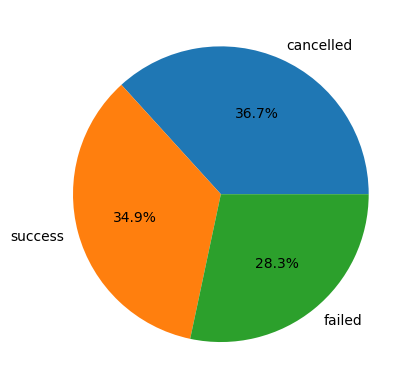

In [356]:
contstat = korea['status'].value_counts()
plt.pie(contstat.values,labels=contstat.index, autopct='%1.1f%%')

In [357]:
# now lets check number of succesful transactions in korea

ksuccessful_trans= korea[korea['status']=='success'].value_counts()
kfailed_trans= korea[korea['status']=='failed'].value_counts()
kcanceled_trans= korea[korea['status']=='cancelled'].value_counts()
print('no success: ',ksuccessful_trans.size)
print('no cancelled: ',kcanceled_trans.size)
print('no failed: ',kfailed_trans.size)
# ksuccessful_transvalue = ksuccessful_trans['status'].value_counts()[0]
# failed_transvalue =failed_trans['status'].value_counts()[0]
# canceled_transvalue=canceled_trans['status'].value_counts()[0]
# valuesy = [ksuccessful_transvalue, failed_transvalue, canceled_transvalue]

no success:  2444
no cancelled:  2571
no failed:  1982


In [358]:
Argentina['customer_id'].value_counts()

customer_id
c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
aa05aca1-bd28-427e-a2ca-07de1f95fdb1    336
567ec5d3-f538-44a2-a55a-681fe4f81064    286
210a6861-599b-4600-85e7-832623ad64d2    252
a7ecbde7-bd2f-408d-ac44-b79c441b212a    240
95027706-87f5-401f-953f-5eb153a23ccd    231
14b95e00-3e4d-476f-bdae-388e348fa9a0    207
cde47fd2-e667-45e1-bb09-a76b4097698e    200
2f7226bd-df3a-445b-b02d-c7dd1e852eda    198
c26ed5e5-ac5e-46fe-94bc-abae62d5a7fe    198
cf8d8ced-dbfd-457b-9262-c49a7aa34d22    192
ba28d0ec-2638-4734-a206-518055f2122e    187
92fc1272-b1d5-48b9-a8a7-78f46658b0c1    153
d4beacfe-dfca-4086-a78d-5af54101cb76    144
d5e90eab-a0ef-46b0-8423-4d31e93d3a29    144
3aa36526-1234-4f51-8ed7-44d528bd34f3    135
e5ec9f81-5a94-4b40-8219-9e80cd9e2ae8    119
fc2a0e40-96d7-4a95-97dd-a494ec3a3e0a    114
033ea6fa-884f-4180-b373-d09dc27b8799    112
6637e13c-e967-40c8-be98-30f241d82423     91
7d3828bc-6490-4038-9e38-81418b889dfb     84
aaaed54d-df1e-43d3-816b-7e50cd03f277     84
00c7d13a-1f04-46b4-a

In [359]:
Argentina['customer_id'].value_counts().shape

(30,)

In [360]:
Argentinauniquecustomerid =Argentina['customer_id'].unique()
Argentinauniquecustomerid


array(['6a43e01f-4081-445b-b960-82b7f4599d8b',
       '95027706-87f5-401f-953f-5eb153a23ccd',
       '26dbb360-4dc1-4e82-8144-9a7f9c2286c8',
       'fc2a0e40-96d7-4a95-97dd-a494ec3a3e0a',
       'e5ec9f81-5a94-4b40-8219-9e80cd9e2ae8',
       '7d3828bc-6490-4038-9e38-81418b889dfb',
       '00c7d13a-1f04-46b4-ac90-8c442270c906',
       '92fc1272-b1d5-48b9-a8a7-78f46658b0c1',
       '210a6861-599b-4600-85e7-832623ad64d2',
       '567ec5d3-f538-44a2-a55a-681fe4f81064',
       'a7ecbde7-bd2f-408d-ac44-b79c441b212a',
       'b13a4df5-08ae-4f3f-873f-88edb9358b1c',
       'd4beacfe-dfca-4086-a78d-5af54101cb76',
       'cf8d8ced-dbfd-457b-9262-c49a7aa34d22',
       'ba28d0ec-2638-4734-a206-518055f2122e',
       '2a23082d-0fe5-425d-b8db-a94f26d969d4',
       '033ea6fa-884f-4180-b373-d09dc27b8799',
       '3aa36526-1234-4f51-8ed7-44d528bd34f3',
       '14b95e00-3e4d-476f-bdae-388e348fa9a0',
       'e48e25d0-5b02-4afd-a28d-c06bd700e2b8',
       'a0884293-ac8c-4736-aad2-b39c31ab1f02',
       'd5e90

In [361]:
Argentina['customer_id'].value_counts()


customer_id
c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
aa05aca1-bd28-427e-a2ca-07de1f95fdb1    336
567ec5d3-f538-44a2-a55a-681fe4f81064    286
210a6861-599b-4600-85e7-832623ad64d2    252
a7ecbde7-bd2f-408d-ac44-b79c441b212a    240
95027706-87f5-401f-953f-5eb153a23ccd    231
14b95e00-3e4d-476f-bdae-388e348fa9a0    207
cde47fd2-e667-45e1-bb09-a76b4097698e    200
2f7226bd-df3a-445b-b02d-c7dd1e852eda    198
c26ed5e5-ac5e-46fe-94bc-abae62d5a7fe    198
cf8d8ced-dbfd-457b-9262-c49a7aa34d22    192
ba28d0ec-2638-4734-a206-518055f2122e    187
92fc1272-b1d5-48b9-a8a7-78f46658b0c1    153
d4beacfe-dfca-4086-a78d-5af54101cb76    144
d5e90eab-a0ef-46b0-8423-4d31e93d3a29    144
3aa36526-1234-4f51-8ed7-44d528bd34f3    135
e5ec9f81-5a94-4b40-8219-9e80cd9e2ae8    119
fc2a0e40-96d7-4a95-97dd-a494ec3a3e0a    114
033ea6fa-884f-4180-b373-d09dc27b8799    112
6637e13c-e967-40c8-be98-30f241d82423     91
7d3828bc-6490-4038-9e38-81418b889dfb     84
aaaed54d-df1e-43d3-816b-7e50cd03f277     84
00c7d13a-1f04-46b4-a

In [362]:
Argentina['customer_id'].value_counts().shape


(30,)

In [363]:
aa05aca1=Argentina[Argentina['customer_id'] == 'aa05aca1-bd28-427e-a2ca-07de1f95fdb1']


In [364]:
aa05aca1.head(3)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,6,27277,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,3,27278,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,4,27279,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success


In [365]:
aa05aca1.describe()

,item_id,line_item_id,event_id,quantity
count,336.000000,336.000000,336.000000,336.000000
mean,8.166667,27282.500000,126604.500000,2.500000
std,4.362208,3.457201,8.089795,1.502237
min,1.000000,27277.000000,126591.000000,1.000000
25%,4.750000,27279.750000,126597.750000,1.000000
50%,8.000000,27282.500000,126604.500000,2.500000
75%,11.500000,27285.250000,126611.250000,3.250000
max,15.000000,27288.000000,126618.000000,5.000000


In [366]:
aa05aca1.loc[:,['device_id','order_id','event_timestamp','quantity','checked_out_at', 'status']]


,device_id,order_id,event_timestamp,quantity,checked_out_at,status
location,,,,,,
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-19 05:59:16.914361,1,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-19 05:59:16.914361,1,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-19 05:59:16.914361,1,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-19 05:59:16.914361,3,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-19 05:59:16.914361,1,2024-03-30 04:11:16.322414,success
...,...,...,...,...,...,...
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-30 04:11:16.322414,5,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-30 04:11:16.322414,4,2024-03-30 04:11:16.322414,success
Argentina,95844728-3adc-4087-af91-48cd4a54e736,94d66f29-8412-493e-bcd9-c42f98554227,2024-03-30 04:11:16.322414,3,2024-03-30 04:11:16.322414,success


In [367]:
aa05aca1_sucess= (Argentina['customer_id'] == 'aa05aca1-bd28-427e-a2ca-07de1f95fdb1') & (Argentina['status']=='success')
Argentina[aa05aca1_sucess]


,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,6,27277,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,3,27278,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,4,27279,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,15,27280,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,3,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,7,27281,94d66f29-8412-493e-bcd9-c42f98554227,126591,2024-03-19 05:59:16.914361,1,USD,2024-03-30 04:11:16.322414,success
...,...,...,...,...,...,...,...,...,...,...,...
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,13,27284,94d66f29-8412-493e-bcd9-c42f98554227,126618,2024-03-30 04:11:16.322414,5,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,5,27285,94d66f29-8412-493e-bcd9-c42f98554227,126618,2024-03-30 04:11:16.322414,4,USD,2024-03-30 04:11:16.322414,success
Argentina,aa05aca1-bd28-427e-a2ca-07de1f95fdb1,95844728-3adc-4087-af91-48cd4a54e736,1,27286,94d66f29-8412-493e-bcd9-c42f98554227,126618,2024-03-30 04:11:16.322414,3,USD,2024-03-30 04:11:16.322414,success


In argentina the one with high transaction was actually sucessful

([<matplotlib.patches.Wedge at 0x22544dd82f0>,
 [Text(0.277967910364963, 1.0642996950142078, 'failed'),
  Text(-0.9962805340355653, -0.46628864183229796, 'cancelled'),
  Text(0.7029139015407173, -0.8461158591001631, 'success')],
 [Text(0.1516188601990707, 0.580527106371386, '41.9%'),
  Text(-0.543425745837581, -0.2543392591812534, '30.2%'),
  Text(0.38340758265857305, -0.46151774132736156, '27.9%')])

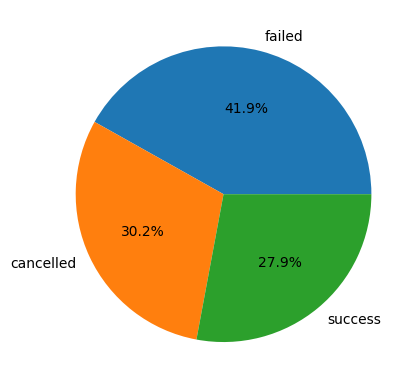

In [368]:
statArgentina = Argentina['status'].value_counts()
plt.pie(statArgentina.values,labels=statArgentina.index, autopct='%1.1f%%')


wow the number of failed transactions was even really much in Argentina


to look more into this i will pick another popular user randomly and check to see if he had sucessful transactions so 

then i neeed to proceed to check if the ones that failled  and see the customer id that conributed to the most fail

In [369]:
Argentinauniquecustomerid = Argentina['customer_id'].unique()
Argentinauniquecustomerid




array(['6a43e01f-4081-445b-b960-82b7f4599d8b',
       '95027706-87f5-401f-953f-5eb153a23ccd',
       '26dbb360-4dc1-4e82-8144-9a7f9c2286c8',
       'fc2a0e40-96d7-4a95-97dd-a494ec3a3e0a',
       'e5ec9f81-5a94-4b40-8219-9e80cd9e2ae8',
       '7d3828bc-6490-4038-9e38-81418b889dfb',
       '00c7d13a-1f04-46b4-ac90-8c442270c906',
       '92fc1272-b1d5-48b9-a8a7-78f46658b0c1',
       '210a6861-599b-4600-85e7-832623ad64d2',
       '567ec5d3-f538-44a2-a55a-681fe4f81064',
       'a7ecbde7-bd2f-408d-ac44-b79c441b212a',
       'b13a4df5-08ae-4f3f-873f-88edb9358b1c',
       'd4beacfe-dfca-4086-a78d-5af54101cb76',
       'cf8d8ced-dbfd-457b-9262-c49a7aa34d22',
       'ba28d0ec-2638-4734-a206-518055f2122e',
       '2a23082d-0fe5-425d-b8db-a94f26d969d4',
       '033ea6fa-884f-4180-b373-d09dc27b8799',
       '3aa36526-1234-4f51-8ed7-44d528bd34f3',
       '14b95e00-3e4d-476f-bdae-388e348fa9a0',
       'e48e25d0-5b02-4afd-a28d-c06bd700e2b8',
       'a0884293-ac8c-4736-aad2-b39c31ab1f02',
       'd5e90

In [370]:
Argentina['customer_id'].value_counts()



customer_id
c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
aa05aca1-bd28-427e-a2ca-07de1f95fdb1    336
567ec5d3-f538-44a2-a55a-681fe4f81064    286
210a6861-599b-4600-85e7-832623ad64d2    252
a7ecbde7-bd2f-408d-ac44-b79c441b212a    240
95027706-87f5-401f-953f-5eb153a23ccd    231
14b95e00-3e4d-476f-bdae-388e348fa9a0    207
cde47fd2-e667-45e1-bb09-a76b4097698e    200
2f7226bd-df3a-445b-b02d-c7dd1e852eda    198
c26ed5e5-ac5e-46fe-94bc-abae62d5a7fe    198
cf8d8ced-dbfd-457b-9262-c49a7aa34d22    192
ba28d0ec-2638-4734-a206-518055f2122e    187
92fc1272-b1d5-48b9-a8a7-78f46658b0c1    153
d4beacfe-dfca-4086-a78d-5af54101cb76    144
d5e90eab-a0ef-46b0-8423-4d31e93d3a29    144
3aa36526-1234-4f51-8ed7-44d528bd34f3    135
e5ec9f81-5a94-4b40-8219-9e80cd9e2ae8    119
fc2a0e40-96d7-4a95-97dd-a494ec3a3e0a    114
033ea6fa-884f-4180-b373-d09dc27b8799    112
6637e13c-e967-40c8-be98-30f241d82423     91
7d3828bc-6490-4038-9e38-81418b889dfb     84
aaaed54d-df1e-43d3-816b-7e50cd03f277     84
00c7d13a-1f04-46b4-a

In [371]:
Argentina['customer_id'].value_counts().shape



(30,)

In [372]:
ba28d0ec=Argentina[Argentina['customer_id'] == 'ba28d0ec-2638-4734-a206-518055f2122e']


In [373]:
ba28d0ec.head(3)



,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Argentina,ba28d0ec-2638-4734-a206-518055f2122e,e103b312-48cd-414b-b7eb-9241c2172e3b,3,16020,ba0765ad-8761-4ed7-850d-5bde57b033a8,74888,2024-03-30 04:03:13.600555,5,NGN,2024-03-30 04:13:13.600624,cancelled
Argentina,ba28d0ec-2638-4734-a206-518055f2122e,e103b312-48cd-414b-b7eb-9241c2172e3b,15,16021,ba0765ad-8761-4ed7-850d-5bde57b033a8,74888,2024-03-30 04:03:13.600555,1,NGN,2024-03-30 04:13:13.600624,cancelled
Argentina,ba28d0ec-2638-4734-a206-518055f2122e,e103b312-48cd-414b-b7eb-9241c2172e3b,1,16022,ba0765ad-8761-4ed7-850d-5bde57b033a8,74888,2024-03-30 04:03:13.600555,3,NGN,2024-03-30 04:13:13.600624,cancelled


In [374]:
ba28d0ec.describe()



,item_id,line_item_id,event_id,quantity
count,187.000000,187.000000,187.000000,187.000000
mean,7.909091,16025.000000,74896.000000,3.272727
std,4.088704,3.170767,4.912131,1.289100
min,1.000000,16020.000000,74888.000000,1.000000
25%,4.000000,16022.000000,74892.000000,3.000000
50%,8.000000,16025.000000,74896.000000,3.000000
75%,11.000000,16028.000000,74900.000000,4.000000
max,15.000000,16030.000000,74904.000000,5.000000


In [375]:

ba28d0ec.loc[:,['device_id','order_id','event_timestamp','quantity','checked_out_at', 'status']]




,device_id,order_id,event_timestamp,quantity,checked_out_at,status
location,,,,,,
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:03:13.600555,5,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:03:13.600555,1,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:03:13.600555,3,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:03:13.600555,1,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:03:13.600555,3,2024-03-30 04:13:13.600624,cancelled
...,...,...,...,...,...,...
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:13:13.600624,3,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:13:13.600624,4,2024-03-30 04:13:13.600624,cancelled
Argentina,e103b312-48cd-414b-b7eb-9241c2172e3b,ba0765ad-8761-4ed7-850d-5bde57b033a8,2024-03-30 04:13:13.600624,4,2024-03-30 04:13:13.600624,cancelled


In [376]:
cust2933e91f_sucess= (Argentina['customer_id'] == 'ba28d0ec-2638-4734-a206-518055f2122e') & (Argentina['status']=='success')

Argentina[cust2933e91f_sucess]




,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,


no succesful transaction

([<matplotlib.patches.Wedge at 0x22544dcf800>,
 [Text(0.4449573738870655, 1.0059885364274914, 'cancelled'),
  Text(-1.061758354107984, -0.2875225164781094, 'success'),
  Text(0.6924378606196172, -0.854710365668118, 'failed')],
 [Text(0.24270402212021752, 0.5487210198695407, '36.7%'),
  Text(-0.5791409204225367, -0.15683046353351418, '34.9%'),
  Text(0.3776933785197912, -0.46620565400079156, '28.3%')])

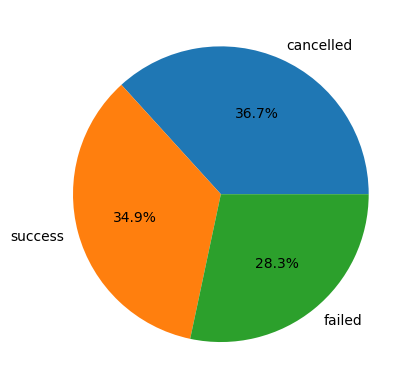

In [377]:
statArgentina2 = Argentina['status'].value_counts()
plt.pie(contstat.values,labels=contstat.index, autopct='%1.1f%%')


In [439]:
custfailed= Argentina[Argentina['status']=='failed']
custfailed['customer_id'].value_counts()



customer_id
c391f179-9eb3-418d-9d7b-b261f2dc57a6    360
567ec5d3-f538-44a2-a55a-681fe4f81064    286
210a6861-599b-4600-85e7-832623ad64d2    252
14b95e00-3e4d-476f-bdae-388e348fa9a0    207
c26ed5e5-ac5e-46fe-94bc-abae62d5a7fe    198
92fc1272-b1d5-48b9-a8a7-78f46658b0c1    153
033ea6fa-884f-4180-b373-d09dc27b8799    112
7d3828bc-6490-4038-9e38-81418b889dfb     84
6a43e01f-4081-445b-b960-82b7f4599d8b     75
2a23082d-0fe5-425d-b8db-a94f26d969d4     55
26dbb360-4dc1-4e82-8144-9a7f9c2286c8     42
e48e25d0-5b02-4afd-a28d-c06bd700e2b8     36
b13a4df5-08ae-4f3f-873f-88edb9358b1c     27
Name: count, dtype: int64

In [442]:
custfailedkorea= korea[korea['status']=='failed']
custfailedkorea['customer_id'].value_counts()



customer_id
2933e91f-39d6-44af-b1e8-933ad172a3c6    324
39568cc0-3642-4234-9b88-c339d6953adf    319
c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810    297
b4139e14-0478-41f0-bcbb-6792f0c6d957    275
8498e8be-5899-4ad4-821f-d0df3da83157    220
b20fe203-25fc-4ad8-96e9-5c8031093064    200
34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf    198
be397c29-0766-4bf0-a315-fa230d7e41d9     96
66e4bef6-a448-4e9e-b807-14a06728753f     30
cd03dc6b-c884-433b-9e01-735e19ade944     16
ea2aa16a-a791-47f0-95c5-066d17b5f09d      7
Name: count, dtype: int64

In [378]:
italy['customer_id'].value_counts()

customer_id
58cf9678-cac3-4de5-91af-2d43797e44b8    144
7f504ad8-3e40-4118-9ab1-4e4658992315    119
cbdcdddc-4117-4290-aa0d-dc8e34720d0b     90
16438ab2-86bd-4eca-b760-47ac0e417d17     72
b68c2de4-769c-4555-8abf-4ae3edd769fd     72
ea5a00fa-e567-4100-8474-203d0d77fc70     55
32fa8a81-3c6a-4e33-add5-f671237ce6ee     45
0bd7e2d5-6957-42b9-8310-9ed5803a1e5d     44
bbd52ddc-c3f6-4613-9af9-1ba884352208     40
94c5fe0e-6833-43f4-996d-5f89c23bb91e     36
a19fe3f8-9e15-4741-87cc-7e765427c9be     32
77d49000-717f-45e9-8e8b-a019383f7386     18
9518936a-9f51-4fe9-bc54-d6ebe4544ba1     16
Name: count, dtype: int64

In [379]:
italy['customer_id'].value_counts().shape

(13,)

In [441]:
custfaileditaly= italy[italy['status']=='failed']
custfaileditaly['customer_id'].value_counts()



customer_id
58cf9678-cac3-4de5-91af-2d43797e44b8    144
7f504ad8-3e40-4118-9ab1-4e4658992315    119
16438ab2-86bd-4eca-b760-47ac0e417d17     72
9518936a-9f51-4fe9-bc54-d6ebe4544ba1     16
Name: count, dtype: int64

In [444]:
confisuccessitaly= italy[italy['status']=='success']
confisuccessitaly['customer_id'].value_counts()



customer_id
cbdcdddc-4117-4290-aa0d-dc8e34720d0b    90
32fa8a81-3c6a-4e33-add5-f671237ce6ee    45
bbd52ddc-c3f6-4613-9af9-1ba884352208    40
a19fe3f8-9e15-4741-87cc-7e765427c9be    32
77d49000-717f-45e9-8e8b-a019383f7386    18
Name: count, dtype: int64

In [380]:
uruguay['customer_id'].value_counts()

customer_id
9283b6ef-af91-415c-8509-ca84dd6b00b5    200
418c418b-3b1d-4cf8-bc4a-eb6d96b075c2    180
14d4524a-6397-46fb-b3f5-465e3623fcde    128
16b3ad60-0921-46e5-84f8-8f26ba134784     80
d95107d6-bc0c-4e35-8286-c3603c448e74     44
784b57d8-8b20-4581-bf58-c1ed11b33c09     44
ea47a95b-0c19-4170-a55b-8638fd274266     21
82faed1f-cffe-4b7b-8438-7f1527d88a11     21
88832fa4-ba3d-4792-90ed-6f70be9e77c5     16
Name: count, dtype: int64

In [381]:
uruguay['customer_id'].value_counts().shape

(9,)

In [443]:
custfaileduru= uruguay[uruguay['status']=='failed']
custfaileduru['customer_id'].value_counts()



customer_id
9283b6ef-af91-415c-8509-ca84dd6b00b5    200
418c418b-3b1d-4cf8-bc4a-eb6d96b075c2    180
16b3ad60-0921-46e5-84f8-8f26ba134784     80
d95107d6-bc0c-4e35-8286-c3603c448e74     44
82faed1f-cffe-4b7b-8438-7f1527d88a11     21
Name: count, dtype: int64

In [446]:
confiurugya= uruguay[uruguay['status']=='success']
confiurugya['customer_id'].value_counts()



customer_id
14d4524a-6397-46fb-b3f5-465e3623fcde    128
784b57d8-8b20-4581-bf58-c1ed11b33c09     44
Name: count, dtype: int64

In [382]:
sales['currency'].unique()

array(['NGN', 'USD', 'GBP'], dtype=object)

In [383]:
currency_and_number_times_used = sales["currency"].value_counts()
currency_and_number_times_used

currency
USD    198037
GBP    191403
NGN    188880
Name: count, dtype: int64

<Axes: xlabel='currency'>

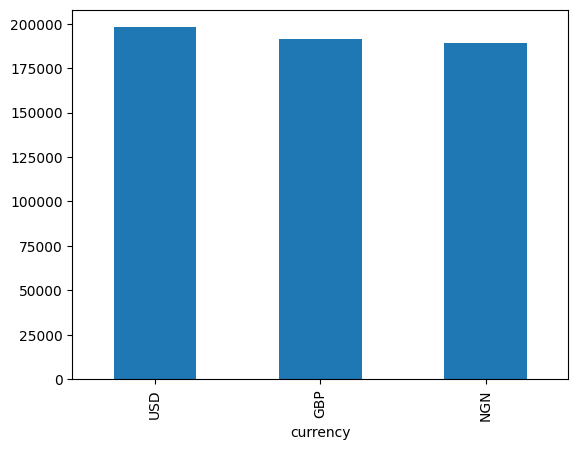

In [384]:
currency_and_number_times_used.plot(kind='bar')

In [385]:
mask2 = (sales["customer_id"] == "ebcb2343-be1b-421e-83eb-6f79a321d999") & (sales["status"]=="success")

In [386]:
sales.loc[mask2]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,5,26108,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,11,26109,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,4,26110,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,2,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,9,26111,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,5,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,2,26112,5984596b-0ed5-4571-8e79-b261e6f138ad,121373,2024-03-27 12:43:53.991103,1,NGN,2024-03-30 04:14:16.072620,success
...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,8,26115,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,4,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,7,26116,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,2,NGN,2024-03-30 04:14:16.072620,success
Wallis and Futuna,ebcb2343-be1b-421e-83eb-6f79a321d999,aa3a57b3-6636-4b91-8fa8-56b0524de6c2,12,26117,5984596b-0ed5-4571-8e79-b261e6f138ad,121402,2024-03-30 04:14:16.072620,3,NGN,2024-03-30 04:14:16.072620,success


In [387]:
this_customer = sales.loc[mask]

In [388]:
this_customer["status"].value_counts()

status
success    360
Name: count, dtype: int64

In [389]:
mask3 =(sales["status"] == "failed")

In [390]:
sales.loc[mask3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed
...,...,...,...,...,...,...,...,...,...,...,...
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed


In [391]:
sales.loc[mask3]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed
...,...,...,...,...,...,...,...,...,...,...,...
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161958,2024-03-30 04:03:18.224196,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,4,34940,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed
Christmas Island,ef15a7b3-326c-405f-9eef-3dbf43c85a9d,74bb4936-9890-421b-a62a-ee544191fa1e,1,34941,ad73a2a0-354a-40bf-81cd-ff017ac859d5,161959,2024-03-30 04:03:18.224198,3,USD,2024-03-30 04:14:18.224200,failed


In [392]:
#lets find out the numbers failed transactions as compared to others..
transaction_status = sales["status"].value_counts()

<Axes: xlabel='status'>

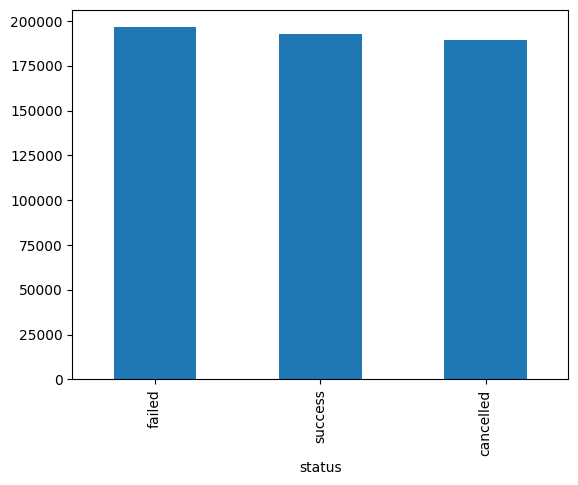

In [393]:
transaction_status.plot(kind= 'bar')

this chart shows there is a problem.because why are there so many failed transactions and cancelled .they even on outweigh successful transactions

In [394]:
currency_by_status=sales.groupby('status')["currency"]

In [395]:
#korea has the most transactions 
#lets see what they are cooking 
# i want to see the ratio of transaction status in korea too to see if they are succressful transactions
#i also want to see the region with the most successful; transactions  and ones with the least

korea = sales.loc['Korea']
korea.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,14,3914,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,5,USD,2024-03-30 04:06:10.636247,cancelled
Korea,3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9,01cf516e-66e6-45f2-a6d6-b6f5f5232778,8,3915,b253052f-6f62-4b1f-bce2-ab2324a2a27c,18219,2024-03-19 10:01:39.523573,2,USD,2024-03-30 04:06:10.636247,cancelled


In [396]:
korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, Korea to Korea
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      6997 non-null   object
 1   device_id        6997 non-null   object
 2   item_id          6997 non-null   int64 
 3   line_item_id     6997 non-null   int64 
 4   order_id         6997 non-null   object
 5   event_id         6997 non-null   int64 
 6   event_timestamp  6997 non-null   object
 7   quantity         6997 non-null   int64 
 8   currency         6997 non-null   object
 9   checked_out_at   6997 non-null   object
 10  status           6997 non-null   object
dtypes: int64(4), object(7)
memory usage: 656.0+ KB


There are 6997 transactions from korea 

In [397]:
korea.shape

(6997, 11)

In [398]:
korea.shape[0]

6997

In [399]:
failedtransaction = korea[korea["status"] == "failed"]
successful_transaction =korea[korea['status']== 'success']
cancelled_trans = korea[korea['status'] == 'cancelled']

In [400]:
failedtransaction.head(2)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,4,4123,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,4,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,7,4124,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed


In [401]:
failedtransaction.shape

(1982, 11)

In [402]:
failedtransaction['customer_id'].nunique()
# or failedtransaction.customer_id.unique()

11

In [403]:
failedtransaction['customer_id'].unique()

array(['34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf',
       '2933e91f-39d6-44af-b1e8-933ad172a3c6',
       'b20fe203-25fc-4ad8-96e9-5c8031093064',
       'c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810',
       'ea2aa16a-a791-47f0-95c5-066d17b5f09d',
       '39568cc0-3642-4234-9b88-c339d6953adf',
       'cd03dc6b-c884-433b-9e01-735e19ade944',
       '66e4bef6-a448-4e9e-b807-14a06728753f',
       '8498e8be-5899-4ad4-821f-d0df3da83157',
       'b4139e14-0478-41f0-bcbb-6792f0c6d957',
       'be397c29-0766-4bf0-a315-fa230d7e41d9'], dtype=object)

if 11 id's caused 1982 failed transactions , something is fishy

In [404]:
failedtransaction['customer_id'].value_counts()

customer_id
2933e91f-39d6-44af-b1e8-933ad172a3c6    324
39568cc0-3642-4234-9b88-c339d6953adf    319
c9b3c52a-9b77-4d33-b9eb-5a3a34dc5810    297
b4139e14-0478-41f0-bcbb-6792f0c6d957    275
8498e8be-5899-4ad4-821f-d0df3da83157    220
b20fe203-25fc-4ad8-96e9-5c8031093064    200
34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf    198
be397c29-0766-4bf0-a315-fa230d7e41d9     96
66e4bef6-a448-4e9e-b807-14a06728753f     30
cd03dc6b-c884-433b-9e01-735e19ade944     16
ea2aa16a-a791-47f0-95c5-066d17b5f09d      7
Name: count, dtype: int64

so we know the id's with the extremely high failed transactions 

In [405]:

cust_34d3c5e1 = failedtransaction[failedtransaction["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"] 

In [406]:
cust_34d3c5e1.head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,4,4123,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,4,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,7,4124,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,12,4125,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,2,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,14,4126,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,1,USD,2024-03-30 04:19:10.675876,failed
Korea,34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf,05ec37c1-5bb4-4033-908b-366e25c02f66,5,4127,15d53794-9b16-429c-9b84-5f2ac3a8c17a,18956,2024-03-30 04:03:10.675805,5,USD,2024-03-30 04:19:10.675876,failed


In [407]:
cust_34d3c5e1.shape

(198, 11)

In [408]:
cust_34d3c5e1.currency.unique()

array(['USD'], dtype=object)

In [409]:
# This customer uses US Dollars($) for transactions...could payment method have associated to the challenge?
# I might still come back to this, to comparw if this customer has any successful transaction...
successful_transaction[successful_transaction["customer_id"] == "34d3c5e1-7e40-40c9-84c3-7d50edfb7eaf"]

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,


this person has no successful transactions .wow now its getting serious 

In [410]:
cust_34d3c5e1["event_timestamp"].value_counts()

event_timestamp
2024-03-30 04:03:10.675869    18
2024-03-30 04:03:10.675806     9
2024-03-30 04:03:10.675807     9
2024-03-30 04:03:10.675808     9
2024-03-30 04:03:10.675805     9
2024-03-30 04:03:10.675852     9
2024-03-30 04:03:10.675855     9
2024-03-30 04:03:10.675857     9
2024-03-30 04:03:10.675856     9
2024-03-30 04:03:10.675860     9
2024-03-30 04:03:10.675861     9
2024-03-30 04:03:10.675862     9
2024-03-30 04:03:10.675858     9
2024-03-30 04:03:10.675863     9
2024-03-30 04:03:10.675865     9
2024-03-30 04:03:10.675866     9
2024-03-30 04:03:10.675867     9
2024-03-30 04:03:10.675871     9
2024-03-30 04:03:10.675872     9
2024-03-30 04:03:10.675873     9
2024-03-30 04:19:10.675876     9
Name: count, dtype: int64

In [411]:
# What could have happened, all of the above transactions occured within 1 minute, can it be attributed to system error or a kind of fraud?

# LEts try and mop up more evidences as to gain understanding of what happened
cust_34d3c5e1["quantity"].sort_values(ascending = False)

location
Korea    5
Korea    5
Korea    5
Korea    5
Korea    5
        ..
Korea    1
Korea    1
Korea    1
Korea    1
Korea    1
Name: quantity, Length: 198, dtype: int64

In [412]:
cust_34d3c5e1["order_id"].value_counts()

order_id
15d53794-9b16-429c-9b84-5f2ac3a8c17a    198
Name: count, dtype: int64

same order id for all 198 transactions 

In [413]:
cust_34d3c5e1["item_id"].unique()

array([ 4,  7, 12, 14,  5,  6, 13, 10,  2])

In [414]:
cust_34d3c5e1["item_id"].value_counts()

item_id
4     22
7     22
12    22
14    22
5     22
6     22
13    22
10    22
2     22
Name: count, dtype: int64

In [415]:
cust_34d3c5e1["event_id"].value_counts()

event_id
18956    9
18957    9
18958    9
18959    9
18960    9
18961    9
18962    9
18963    9
18964    9
18965    9
18966    9
18967    9
18968    9
18969    9
18970    9
18971    9
18972    9
18973    9
18974    9
18975    9
18976    9
18977    9
Name: count, dtype: int64

In [416]:
cust_34d3c5e1["event_id"].nunique()

22

In [417]:
cust_34d3c5e1.duplicated().sum() # this customer do not have any duplicate

np.int64(0)

#### Insights:
From my discovery in this dataset... I could say that the transactions from customer "cust_34d3c5e1" may not have been carried out by a human because of the consistency of the patterns... the failed transactions may be carried out by a bot or it could be a system error.
#### Recommendation:
The business and innovation team should look at the case more intensely as I would go on and analyse all other failed transactions to uncover more insights...
Further more, a compresensive report would be written to highlight the findings of this analysis.

In [418]:
#since korea has the most purchase lets dig deeper into them

korea.currency.unique()

array(['USD', 'GBP', 'NGN'], dtype=object)

<Axes: xlabel='currency'>

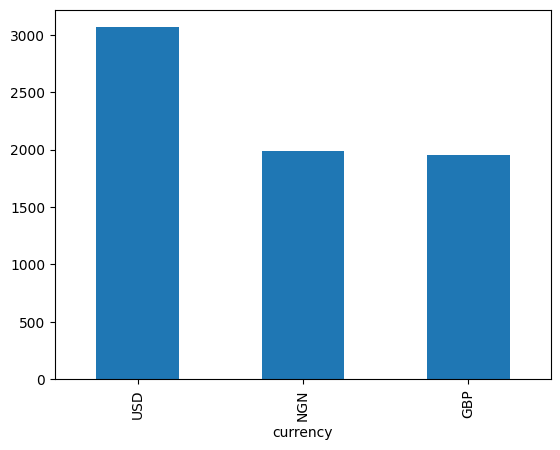

In [419]:
korea.currency.value_counts().plot(kind= 'bar')

peopple in korea seem to use more us dolars in there purchase than other currencies

In [420]:
korea.status.value_counts()

status
cancelled    2571
success      2444
failed       1982
Name: count, dtype: int64

<Axes: xlabel='status'>

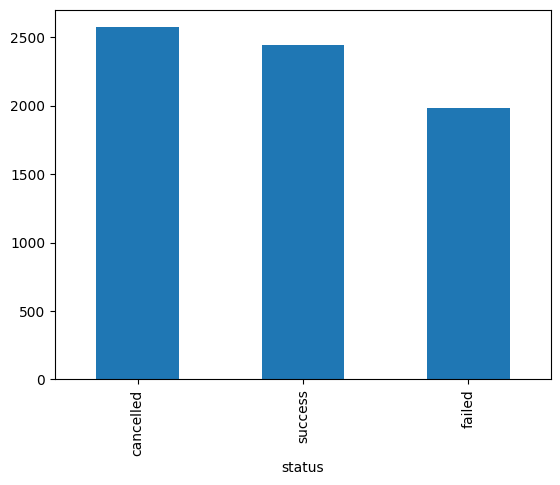

In [421]:
korea.status.value_counts().plot(kind='bar')

In [422]:
korea['customer_id'].unique

<bound method Series.unique of location
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
Korea    3b0ae8c1-68c6-40c8-a13a-e2bffb5ffdf9
                         ...                 
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Korea    e9345bdc-3b15-4cab-9526-0d690021db61
Name: customer_id, Length: 6997, dtype: object>

In [423]:
sales['device_id'].nunique()

4594

In [424]:
sales["item_id"].value_counts()

item_id
11    39715
15    39268
8     39162
10    39084
2     38997
1     38866
4     38842
6     38835
5     38782
12    38440
7     38291
14    38043
13    37515
3     37501
9     36979
Name: count, dtype: int64

In [425]:
sales.item_id.nunique()

15

In [426]:
sales.line_item_id.unique()

array([ 3201,  3202,  3203, ..., 34939, 34940, 34941], shape=(31741,))

In [427]:
sales.line_item_id.nunique()

31741

In [428]:
mask4 = (sales['status'].str.contains('failed'))

In [429]:
sales.loc[mask4].head()

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14800,2024-03-19 19:06:51.166018,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14801,2024-03-30 04:03:10.410889,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14802,2024-03-30 04:03:10.411144,3,NGN,2024-03-30 04:09:10.411149,failed
Djibouti,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,9,3207,cddddfea-27ef-437f-817d-8f849d604c3c,14803,2024-03-30 04:09:10.411149,3,NGN,2024-03-30 04:09:10.411149,failed
Mali,f40fc2b7-0a0f-46e8-8fc5-4edfa5eb832b,76c265ff-c670-433a-887f-4b0d7a991349,4,3215,e332c5bf-f01c-421c-b046-63bf2b6b4273,14886,2024-03-30 04:03:10.424891,3,NGN,2024-03-30 04:06:10.425055,failed


In [430]:
# this one filtered out all of the ones with "failed" using "~"
sales.loc[~mask4].head(10)

,customer_id,device_id,item_id,line_item_id,order_id,event_id,event_timestamp,quantity,currency,checked_out_at,status
location,,,,,,,,,,,
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,5,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,12,3204,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,1,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,6,3205,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,11,3206,9e950ce3-2e12-479c-a051-493c1a497d49,14786,2024-03-26 22:05:58.863661,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,4,3201,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,2,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,5,3202,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,4,NGN,2024-03-30 04:19:10.406794,success
Saint Helena,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,9,3203,9e950ce3-2e12-479c-a051-493c1a497d49,14787,2024-03-27 07:14:33.987347,5,NGN,2024-03-30 04:19:10.406794,success
